# EDA on EuroSAT data

In [27]:
import torchvision
from torchvision import transforms
import matplotlib.pyplot as plt
import numpy as np
import random
from collections import Counter

In [28]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [29]:
transform = transforms.Compose([transforms.ToTensor()])
train_dataset = torchvision.datasets.EuroSAT(
    root='./data',            # Specify the directory where the data will be stored
    transform=transform,      
    download=True             
)

In [30]:
print('Obs No.:', len(train_dataset))
print("Classes:",(train_dataset.classes))

Obs No.: 27000
Classes: ['AnnualCrop', 'Forest', 'HerbaceousVegetation', 'Highway', 'Industrial', 'Pasture', 'PermanentCrop', 'Residential', 'River', 'SeaLake']


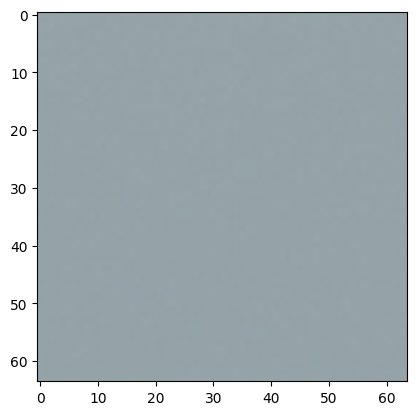

SeaLake


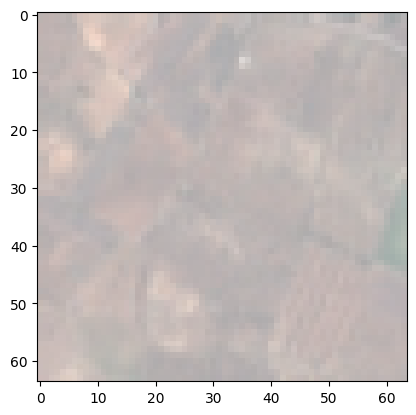

PermanentCrop


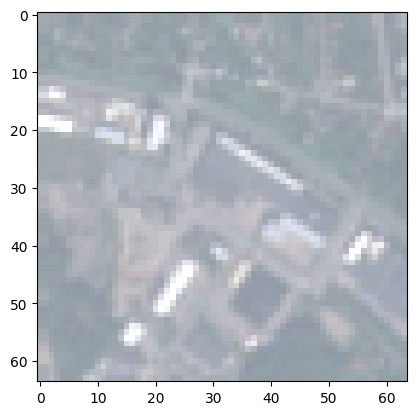

Industrial


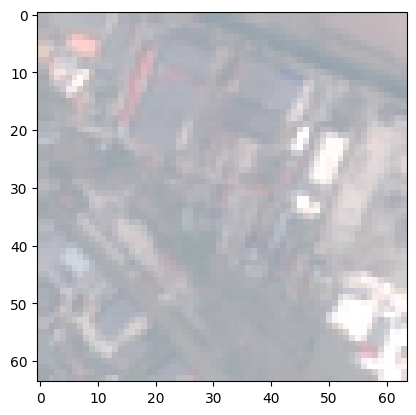

Industrial


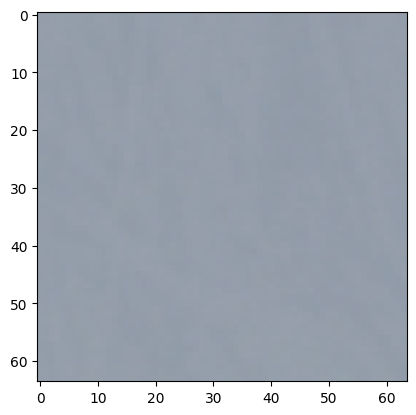

SeaLake


In [31]:
def imshow(img):
    img = img / 2 + 0.5  # Unnormalize the image
    np_img = img.numpy()
    plt.imshow(np.transpose(np_img, (1, 2, 0)))
    plt.show()

# Show a few random images
for i in np.random.randint(0, 27000, 5).tolist():
    data_sample, label = train_dataset[i]
    imshow(data_sample)
    print(train_dataset.classes[label])

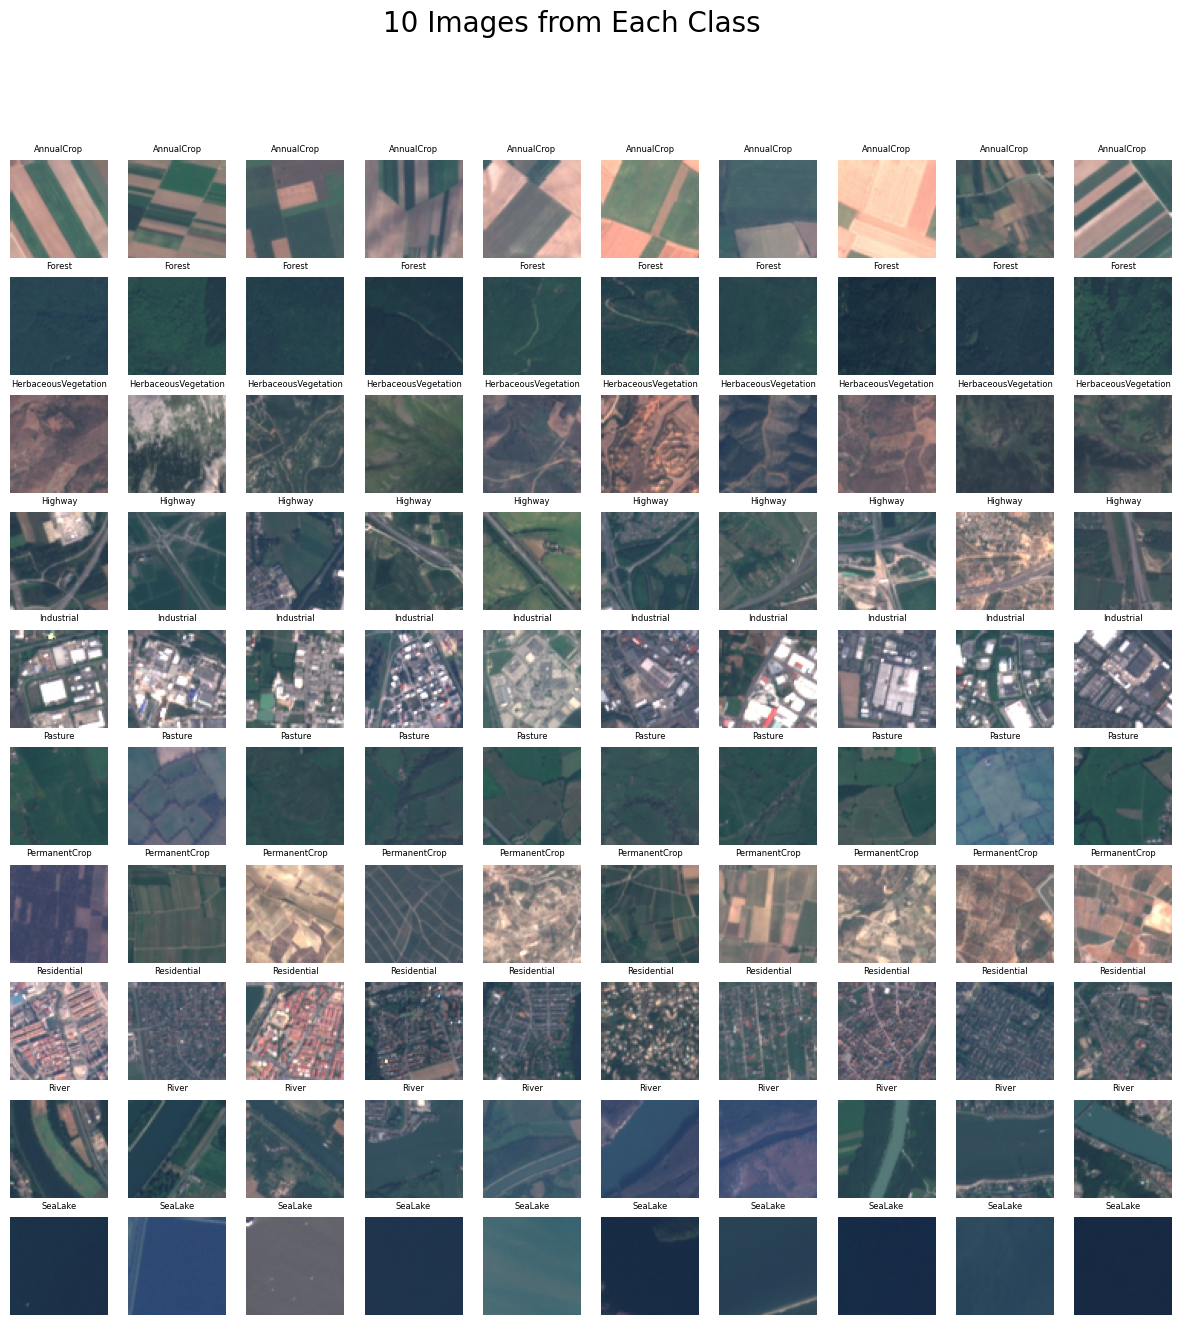

In [32]:
# Define the number of images to display per class
num_images_per_class = 10

# Create a dictionary to store images for each class
class_images = {class_label: [] for class_label in train_dataset.classes}

# Collect images from each class
for data_sample, label in train_dataset:
    class_label = train_dataset.classes[label]
    class_images[class_label].append(data_sample)

# Plot the collected and shuffled images, 10 from each class, using subplots
num_rows = len(train_dataset.classes)
num_cols = num_images_per_class

plt.figure(figsize=(15, 15))
for i, class_label in enumerate(train_dataset.classes):
    # Shuffle the collected images for each class (reshuffle for every class)
    shuffled_images = random.sample(class_images[class_label], num_images_per_class)
    for j in range(num_images_per_class):
        plt.subplot(num_rows, num_cols, i * num_images_per_class + j + 1)
        plt.imshow(np.transpose(shuffled_images[j].numpy(), (1, 2, 0)))  # Convert back to HWC format
        plt.title(f"{class_label}",fontsize=6)
        plt.axis('off')

plt.suptitle('10 Images from Each Class', fontsize=20)
plt.show()

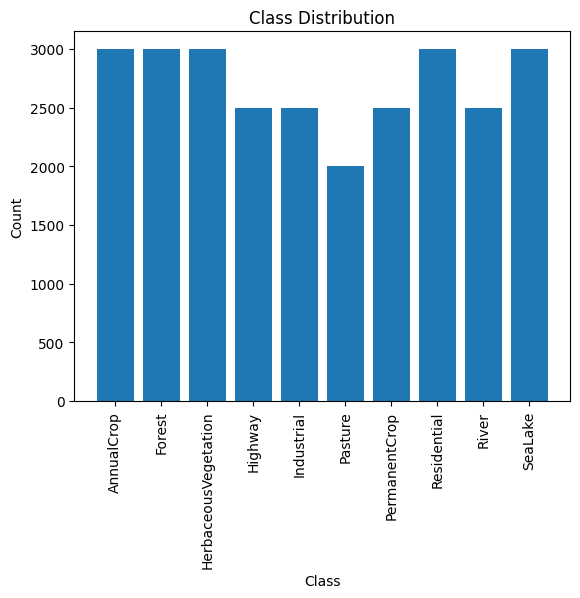

In [34]:
# Calculate class distribution
labels = [label for _, label in train_dataset]
class_distribution = Counter(labels)

# Plot class distribution
plt.bar(class_distribution.keys(), class_distribution.values())
plt.xticks(range(len(train_dataset.classes)), train_dataset.classes, rotation=90)
plt.xlabel("Class")
plt.ylabel("Count")
plt.title("Class Distribution")
plt.show()